# Cybersecurity: Suspicious Web Threat Interactions

## Project Overview
This project analyzes web traffic data to identify suspicious interactions and potential cyber threats. Using data exploration, visualization, and machine learning models, we detect anomalous patterns and classify network interactions as normal or suspicious.

## Dataset
The dataset used in this project, `CloudWatch_Traffic_Web_Attack.csv`, contains various attributes related to web traffic, such as IP addresses, timestamps, bytes transferred, and detection types.

### Key Features:
- **Time-based attributes** (`creation_time`, `end_time`, `time`) to analyze session durations.
- **Traffic attributes** (`bytes_in`, `bytes_out`, `dst_port`) to assess network usage.
- **Source attributes** (`src_ip`, `src_ip_country_code`) to track originating traffic locations.
- **Detection labels** (`detection_types`) to identify attack patterns.

## Data Processing & Exploration
1. **Handling Missing & Duplicate Data**
   - Checked for null values and duplicates.
   - Converted time-based columns to datetime format.
   
2. **Exploratory Data Analysis (EDA)**
   - Visualized unique values in different columns.
   - Analyzed traffic patterns by country.
   - Examined `bytes_in` and `bytes_out` variations over time.
   - Created heatmaps of data distribution.

## Feature Engineering
- **Derived `duu_time` (session duration)** from start and end timestamps.
- **Standardized numerical features** using `StandardScaler`.
- **One-hot encoded categorical features** (source country codes).

## Machine Learning Models
### K-Nearest Neighbors (KNN)
- Features: `bytes_in`, `bytes_out`, `dst_port`
- Evaluated using cross-validation.
- Assessed train vs test accuracy.

### Random Forest Classifier
- Features: `bytes_in`, `bytes_out`, `SC_duu_time`
- Target: `suspicious` (binary label derived from `detection_types`)
- Model trained on processed data.
- Achieved accuracy evaluation and classification report.

## Results
- **KNN Model**: Evaluated cross-validation accuracy and performance metrics.
- **Random Forest Model**: Provided classification insights and accuracy scores for anomaly detection.

# Cybersecurity: Suspicious Web Threat Interactions

## Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [5]:
df =  pd.read_csv("CloudWatch_Traffic_Web_Attack.csv")

In [6]:
df

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


## Data Procesing

In [8]:
print( df.info())
print(" ")
print("Dupicates: ", df.duplicated().sum())
print(" ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

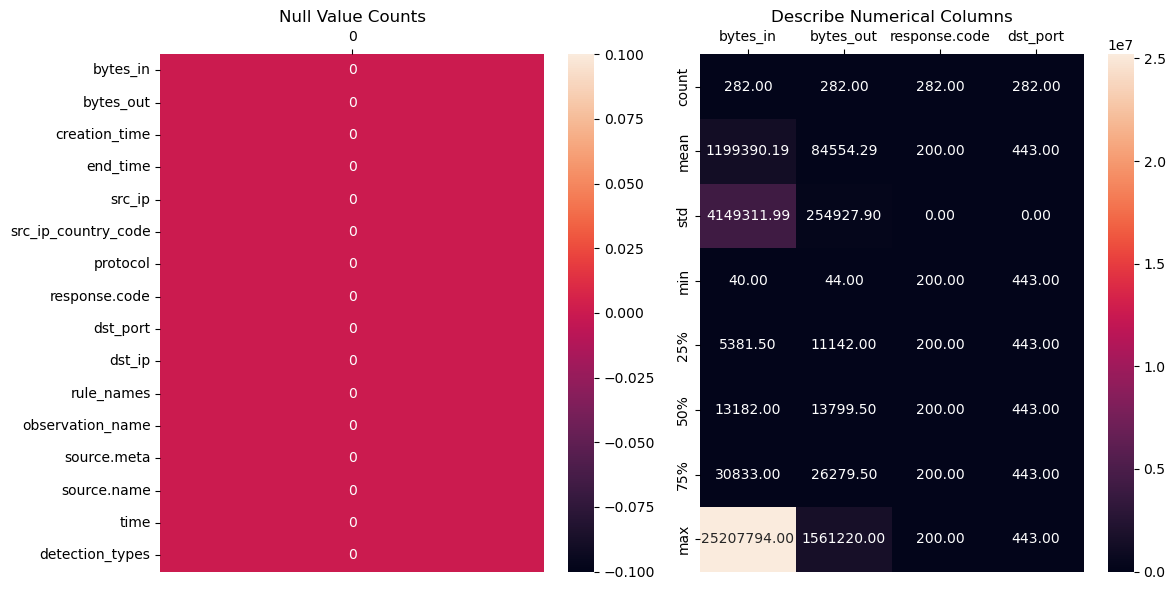

In [9]:
# Null Value checking and Nmerical columns describe
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
ax1 = sns.heatmap(pd.DataFrame(df.isnull().sum()), annot = True, ax = axes[0])
ax2 = sns.heatmap(df.describe(), annot =  True, fmt = ".2f", ax = axes[1])
ax1.set_title("Null Value Counts")
ax2.set_title("Describe Numerical Columns")
ax1.xaxis.tick_top()
ax2.xaxis.tick_top()
plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types'],
      dtype='object')

In [11]:
# Change type of columns
Time_columns = list(df.columns[2:4]) + [df.columns[14]]
print("Colums list to change the datatype to datetime format: \n", Time_columns)
print(" ")
for i in Time_columns:
    df[i] = pd.to_datetime(df[i])
df.info()

Colums list to change the datatype to datetime format: 
 ['creation_time', 'end_time', 'time']
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object      

## EDA

### Unique Value Checking :

In [14]:
for i in df.columns:
        print("Unique_Values of",i, "Column :",df[i].unique())
        print(" ")
        print("unique_Values_Count of",i, "Column :" ,len(df[i].unique()))
        print(25*"-")

Unique_Values of bytes_in Column : [    5602    30912    28506    30546     6526     3906    17748  4767917
    10538     9656    57208    18162    28056    73752     4080  1968903
     6958     8310  4804723    11820     8206    29356    26178    29308
    60068     4043     3102     5528     4926     7724       80    23048
    28444     5824    10474  4190330     5080     4220      952    36745
    12068    57462  2015975     4064    33268     7424  4758826    17736
    60686    21698    28296     4721     9968  4791678    10768     3996
    26354    33777    28762    28478     4288     8874  4793434    16948
     5810    28730    29002    44270  2019990     3498    16698  4794053
     6606     9910    26250    21448    28524     9600     7786    33662
     6480     4018    38560    57088  1215594     3514    13338  4803684
    13132     5238     9052    31076    28518    43660    26820     3206
    35894     9132  4801644    22790    29040    27938    34660  4809606
     6742     41

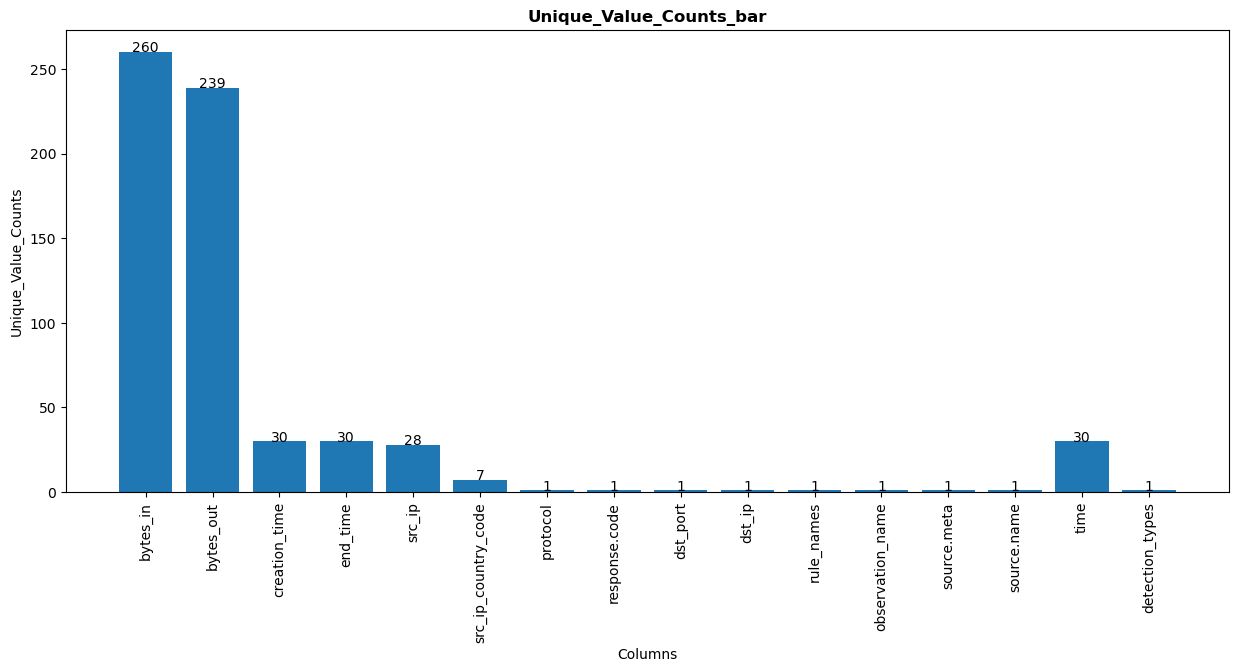

(Rows,Columns) (282, 16)


In [15]:
Unique_Value_Counts = []
for i in df.columns:
    Unique_Value_Counts.append(len(df[i].unique()))
       
plt.figure(figsize = (15,6))
bars = plt.bar( df.columns, Unique_Value_Counts,)
plt.xticks(rotation = 90)

for i in range(len(bars)):
    plt.text(i,Unique_Value_Counts[i],Unique_Value_Counts[i], ha = 'center')

plt.title("Unique_Value_Counts_bar", fontweight = "bold")
plt.xlabel("Columns")
plt.ylabel("Unique_Value_Counts")
plt.show()
print("(Rows,Columns)",df.shape)

#### Summary of unique Value Checking
bytes_in - 260 entries

bytes_out - 239 239 entries

creation_time , end_time , time = Time when start & end, Recoeding time event. Having 30 times recorded

src_ip - 28 ip sources recorded

src_ip_country_code - soruces ip contry listed out

### Country wise approch

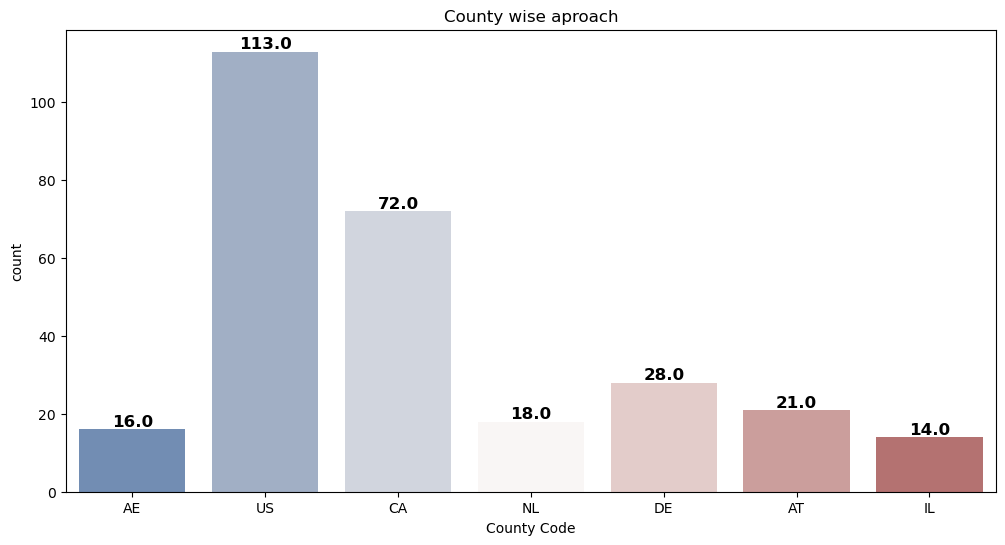

In [ ]:
# country wise web thread approach
plt.figure(figsize = (12,6))
ax = sns.countplot(data = df, x = "src_ip_country_code" , palette = "vlag")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.title("County wise aproach")
plt.xlabel("County Code")
plt.show()

### bytes_in, bytes_out Variation

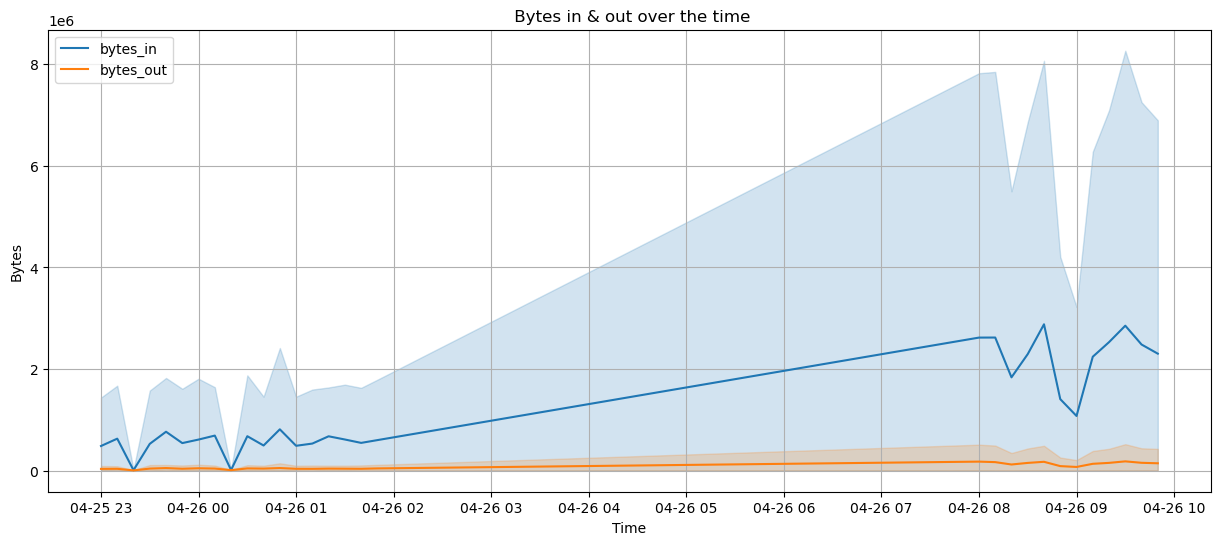

In [20]:
plt.figure(figsize = (15,6))
sns.lineplot(data = df, x = "time", y = "bytes_in", label = "bytes_in" )
sns.lineplot(data = df, x = "time", y = "bytes_out", label = "bytes_out")
plt.title(" Bytes in & out over the time")
plt.xlabel("Time")
plt.ylabel("Bytes")
plt.legend()
plt.grid(True)
plt.show()

### sorce IP Total bytes in and out

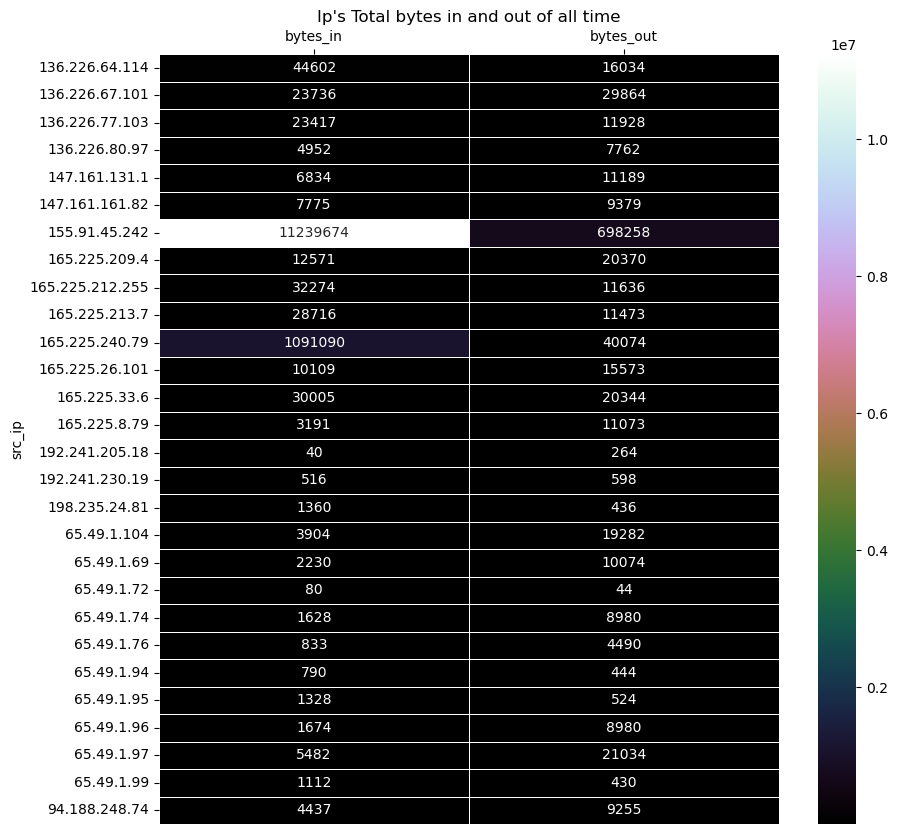

In [ ]:
# sorce IP Total bytes in and out

plt.figure(figsize = (10,10))
ax = sns.heatmap(df.pivot_table( index = "src_ip", values = ["bytes_in","bytes_out"]), 
            annot = True, fmt = ".0f", 
            cmap = "cubehelix", 
            linecolor = "white", linewidths = 0.5
           )
ax.xaxis.tick_top()
plt.title("Ip's Total bytes in and out of all time")
plt.show()

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

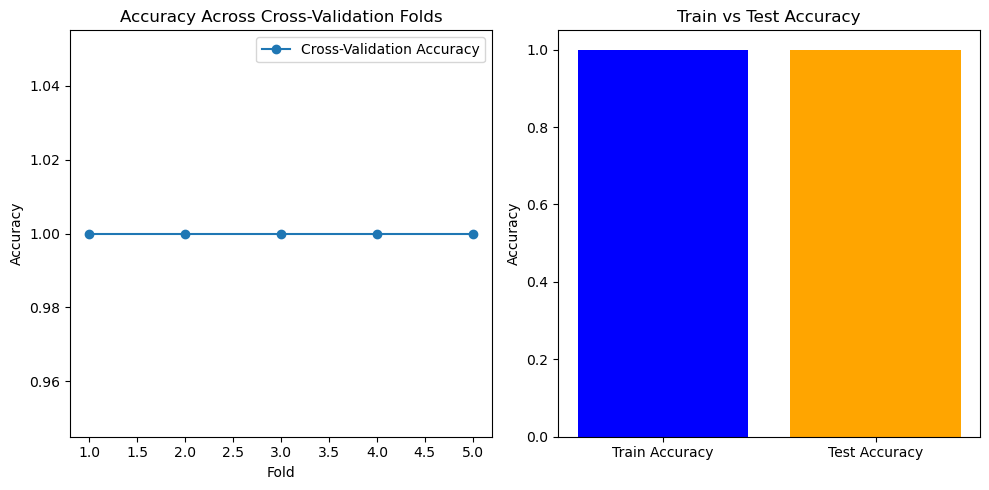

In [27]:

X = df[['bytes_in', 'bytes_out', 'dst_port']]

y = y = df['response.code'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 6), cv_scores, label='Cross-Validation Accuracy', marker='o')
plt.title('Accuracy Across Cross-Validation Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

knn.fit(X_train_scaled, y_train)
train_accuracy = accuracy_score(y_train, knn.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))

plt.subplot(1, 2, 2)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

## Model

### Transform data

In [60]:
# Connection duration in seconds

df["duu_time"] = (df["end_time"] -  df["creation_time"]).dt.total_seconds()

In [74]:
# Columns Transformarion 

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df[["bytes_in", "bytes_out", "duu_time"]]), 
                         columns = ["SC_bytes_in","SC_bytes_out", "SC_duu_time"], 
                         index = df.index
                        )
scaled_df

,SC_bytes_in,SC_bytes_out,SC_duu_time
0,-0.288219,-0.281223,0.0
1,-0.282108,-0.260804,0.0
2,-0.282689,-0.279344,0.0
3,-0.282197,-0.276161,0.0
4,-0.287996,-0.277678,0.0
...,...,...,...
277,-0.279592,-0.280476,0.0
278,-0.288693,-0.319733,0.0
279,5.796403,5.802781,0.0
280,-0.288187,-0.284665,0.0


In [104]:
# One Hot Encoder for categorigal column

encoder = OneHotEncoder( sparse_output = False)

encoded_df = pd.DataFrame(encoder.fit_transform(df[["src_ip_country_code"]]),
                          columns = encoder.get_feature_names_out(["src_ip_country_code"]),
                          index = df.index)

encoded_df

,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
277,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,1.0,0.0,0.0,0.0
279,0.0,0.0,0.0,0.0,0.0,0.0,1.0
280,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [122]:
# Combine all 3 df into 1  & add suspisious nemeric column

t_df = pd.concat([df, scaled_df, encoded_df], axis = 1)

t_df["suspicious"] = (t_df["detection_types"] == "waf_rule").astype(int)

t_df

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,SC_bytes_out,SC_duu_time,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US,suspicious
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,-0.281223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,-0.260804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,-0.279344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,-0.276161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,-0.277678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,...,-0.280476,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
278,3638,3190,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,...,-0.319733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,...,5.802781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
280,5736,12114,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,...,-0.284665,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


### Randon Forest model

In [133]:
# Nuemerwic Columns
X = t_df[["bytes_in", "bytes_out", "SC_duu_time"]]

# Binary Llable

y =  t_df["suspicious"]

In [137]:
# split the data and train the model 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize
rf_class = RandomForestClassifier(n_estimators = 100,
                                  random_state = 42)

# Train

rf_class.fit(X_train, y_train)

# Predict

y_pred = rf_class.predict(X_test)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [151]:
# Evaluate

acc = accuracy_score(y_test, y_pred)

Classification = classification_report(y_test, y_pred)

print("ACCURACY : ", acc)
print(25*"-")
print("Classification Report \n", Classification)

ACCURACY :  1.0
-------------------------
Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        85

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



In [127]:
t_df

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,SC_bytes_out,SC_duu_time,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US,suspicious
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,-0.281223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,-0.260804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,-0.279344,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,-0.276161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,-0.277678,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,...,-0.280476,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
278,3638,3190,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,...,-0.319733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,...,5.802781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
280,5736,12114,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,...,-0.284665,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
